In [77]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [78]:
img = cv2.imread('/Users/yb/Coding_Projects/CV_course/car_plate.jpg')

In [79]:
def display(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

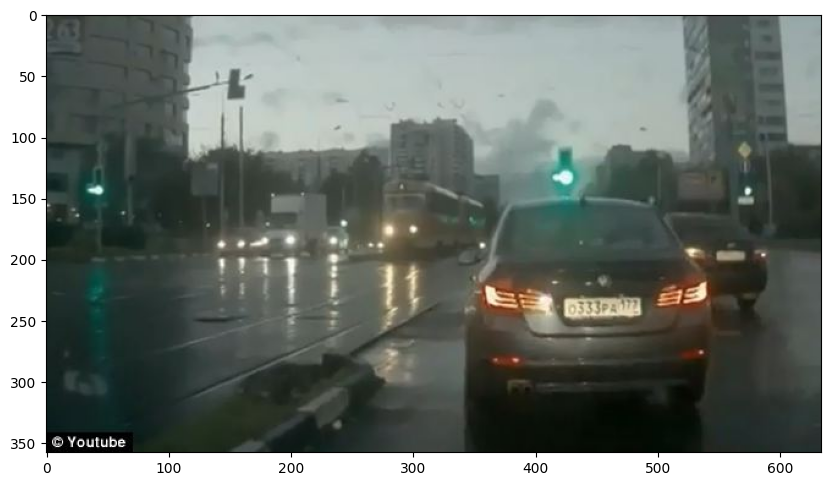

In [80]:
display(img)

In [81]:
cascade = cv2.CascadeClassifier('/Users/yb/Coding_Projects/CV_course/haarcascades/haarcascade_russian_plate_number.xml')

In [82]:
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 10) 
        
    return plate_img
    

In [83]:
result = detect_plate(img)

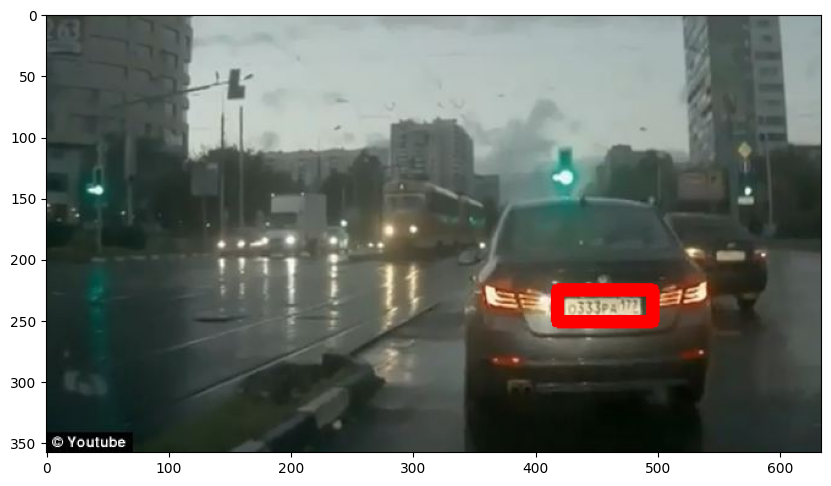

In [84]:
display(result)

In [85]:
def detect_and_blur_plate(img):
    
    # Watch solutions video for line by line explanation!
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [86]:
result = detect_and_blur_plate(img)

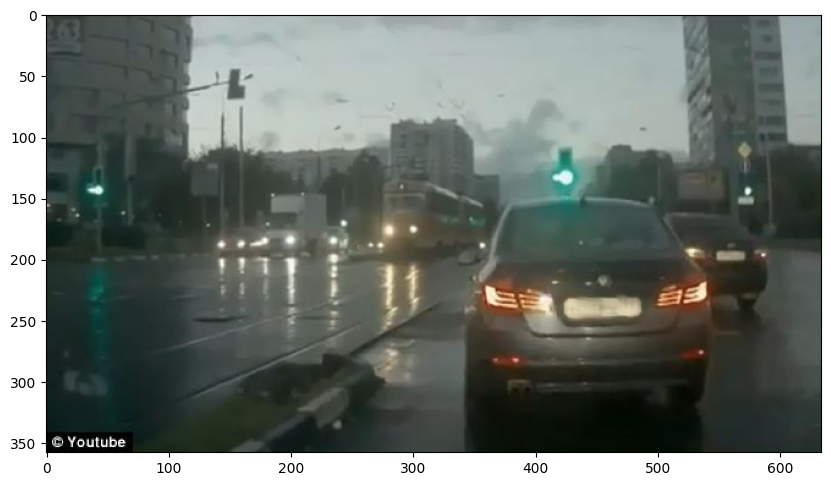

In [87]:
display(result)